### Track World Records

For the Marathon, the fastest man has only run the race 10% faster than the fastest women. Given the substantial progress in the world record time for the Marathon over the past century (about 30%), I wondered how long ago the men ran at the same pace as women do today.

I calculate this for each race, as well as show the evolution of the race times from the 100m to the full marathon over the past century.  Quickly, it became apparent that many of the women's world records were recorded before 1990.  This has been pointed out a number of times as a consequence of prevalent doping prior to the institution of randomized drug tests in 1989.  It appears doping had a much larger impact on women than men.


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
from matplotlib import animation, rc
from IPython.display import HTML

### Original Data of world record times
2015 data extracted from a PDF of historical world records from the IAAF:

http://iaaf-ebooks.s3.amazonaws.com/2015/Beijing-2015-Statistics-Handbook/index.htm

In [3]:
dn = '2015worldrecords/'
fns = ['100m.txt','200m.txt','400m.txt','800m.txt','1000m.txt','1500m.txt','mile.txt',
            '2000m.txt','3000m.txt','5000m.txt','10km.txt','20km.txt','halfmarathon.txt','25km.txt','marathon.txt',
      '100mf.txt','200mf.txt','400mf.txt','800mf.txt','1000mf.txt','1500mf.txt','milef.txt',
            '2000mf.txt','3000mf.txt','5000mf.txt','10kmf.txt','20kmf.txt','halfmarathonf.txt','25kmf.txt','marathonf.txt']

We record distances in meters.

In [4]:

distance = array([100.,200.,400.,800.,1000.,1500.,1609.34,2000.,3000.,5000.,1.e4,2.e4,21097.5,2.5e4,2*21097.5,
                  100.,200.,400.,800.,1000.,1500.,1609.34,2000.,3000.,5000.,1.e4,2.e4,21097.5,2.5e4,2*21097.5])

In [5]:
Ndistance = array(['100 m','200 m','400 m','800 m','1000 m','1500 m','Mile','2000 m',
                   '3000 m','5000 m','10 km','20 km','Half\nMarathon','25 km','Marathon'])

In [6]:
dd = distance

In [7]:
dd

array([   100.  ,    200.  ,    400.  ,    800.  ,   1000.  ,   1500.  ,
         1609.34,   2000.  ,   3000.  ,   5000.  ,  10000.  ,  20000.  ,
        21097.5 ,  25000.  ,  42195.  ,    100.  ,    200.  ,    400.  ,
          800.  ,   1000.  ,   1500.  ,   1609.34,   2000.  ,   3000.  ,
         5000.  ,  10000.  ,  20000.  ,  21097.5 ,  25000.  ,  42195.  ])

In [8]:
len(distance)

30

In [9]:
gender = []
for i in arange(len(distance)/2.):
    gender.append('m')
for i in arange(len(distance)/2.):
    gender.append('f')
    
    

Read in the data into the pandas framework:

In [10]:
df2 = pd.DataFrame(columns=('Distance','Gender','Time', 'Name', 'Date', 'Year') )
for i in arange(len(fns)):
    print i, fns[i]
    lines = [line.rstrip('\n').replace('y .','.').replace('+ .','.').replace('+.','.').replace('y.','.').replace('. ','!').split('!') for line in open(dn+fns[i])]
    ind = len(lines)
    df = pd.DataFrame(index=np.arange(0, ind), columns=('Distance','Gender','Time', 'Name', 'Date', 'Year') )

    for j in arange(len(lines)):
        vals = pd.unique(lines[j])
        #print j, len(vals),vals
        try:
            df.loc[j]["Time"] = float(vals[0])
        except:
            vv = vals[0].split(':')
            v0 = 0
            for k in arange(len(vv)):
                try:
                    v0 = v0+60**k*float(vv[-k-1])
                except:
                    print "badtime",i,j,vv
            df.loc[j]["Time"] = v0
        try:
            df.loc[j]["Date"] = pd.Timestamp(vals[-1])
        except:
            print "badyear", i, j, vals[-1], vals
        yr= pd.Timestamp(vals[-1]).year + pd.Timestamp(vals[-1]).month/12.
        if((j<8) and (yr > 1975) and (gender[i]=='m')):
            if( ((i==10)==False) and ((i==12)==False)):
                yr = yr - 100
                    
        if((yr>2016)):
            yr = yr - 100
        #if(j < 10):
        try:
            df.loc[j]["Year"] = float(yr)
            df.loc[j]["Name"] = vals[-4]
            df.loc[j]["Distance"] = distance[i]
            df.loc[j]["Gender"] = gender[i]
        except:
            print "bad",i,fns[i],j,vals
    df.to_csv(dn+fns[i]+'.csv')
    df2 = df2.append(df,ignore_index=True)

0 100m.txt
1 200m.txt
2 400m.txt
3 800m.txt
4 1000m.txt
5 1500m.txt
6 mile.txt
7 2000m.txt
8 3000m.txt
9 5000m.txt
10 10km.txt
11 20km.txt
12 halfmarathon.txt
13 25km.txt
14 marathon.txt
15 100mf.txt
16 200mf.txt
17 400mf.txt
18 800mf.txt
19 1000mf.txt
20 1500mf.txt
21 milef.txt
22 2000mf.txt
23 3000mf.txt
24 5000mf.txt
25 10kmf.txt
26 20kmf.txt
27 halfmarathonf.txt
28 25kmf.txt
29 marathonf.txt


In [11]:
df2.to_csv(dn+'allrecords.csv')

In [12]:
for i in distance:
   print  i, df2["Year"][df2["Distance"]==i].min(),df2["Year"][df2["Distance"]==i].max()

100.0 1912.58333333 2009.66666667
200.0 1922.66666667 2009.66666667
400.0 1900.75 1999.66666667
800.0 1912.58333333 2012.66666667
1000.0 1913.5 1999.75
1500.0 1912.5 1998.58333333
1609.34 1913.41666667 1999.58333333
2000.0 1918.5 1999.75
3000.0 1912.58333333 1996.75
5000.0 1912.58333333 2008.5
10000.0 1968.0 2010.75
20000.0 1958.66666667 2015.16666667
21097.5 1964.83333333 2015.16666667
25000.0 1947.83333333 2012.41666667
42195.0 1908.58333333 2014.75
100.0 1912.58333333 2009.66666667
200.0 1922.66666667 2009.66666667
400.0 1900.75 1999.66666667
800.0 1912.58333333 2012.66666667
1000.0 1913.5 1999.75
1500.0 1912.5 1998.58333333
1609.34 1913.41666667 1999.58333333
2000.0 1918.5 1999.75
3000.0 1912.58333333 1996.75
5000.0 1912.58333333 2008.5
10000.0 1968.0 2010.75
20000.0 1958.66666667 2015.16666667
21097.5 1964.83333333 2015.16666667
25000.0 1947.83333333 2012.41666667
42195.0 1908.58333333 2014.75


Generate an array with the world record average pace (in minutes per mile) for every year between 1908 and 2015.  This is used to generate a simple movie showing the evolution of the world record for men and women. 

In [13]:
years = arange(1908,2015)

In [14]:
pps = zeros((years.size,distance.size/2))
ppsf = zeros((years.size,distance.size/2))
for i in arange(years.size):
    for j in arange(distance.size/2):
        #print i,j#,df2["Time"][(df2["Distance"]==distance[j])*(df2["Year"]<years[i])][-1]
        try:
            #print years[i], distance[j], df2["Time"][(df2["Distance"]==distance[j])*(df2["Year"]<years[i])].values[-1]
            pps[i,j] = df2["Time"][(df2["Gender"]=='m') & (df2["Distance"]==distance[j]) & (df2["Year"]<years[i])].values[-1]/distance[j]*1609.34/60.
            
        except:
            #print "bad"
            pps[i,j] = nan#df2["Time"][(df2["Distance"]==distance[j])].values[0]/distance[j]*1609.34/60.
            #print i,j,"didn't work"#, df2["Time"][(df2["Distance"]==distance[j])*(df2["Year"]<years[i])]
        try:
            #print years[i], distance[j], df2["Time"][(df2["Distance"]==distance[j])*(df2["Year"]<years[i])].values[-1]
            ppsf[i,j] = df2["Time"][(df2["Gender"]=='f') & (df2["Distance"]==distance[j]) & (df2["Year"]<years[i])].values[-1]/distance[j]*1609.34/60.
            
        except:
            #print "bad"
            ppsf[i,j] = nan#df2["Time"][(df2["Distance"]==distance[j])].values[0]/distance[j]*1609.34/60.
            #print i,j,"didn't work"#, df2["Time"][(df2["Distance"]==distance[j])*(df2["Year"]<years[i])]
        

How does the world record pace change throughout time?

[100, 100000.0, 2, 6]

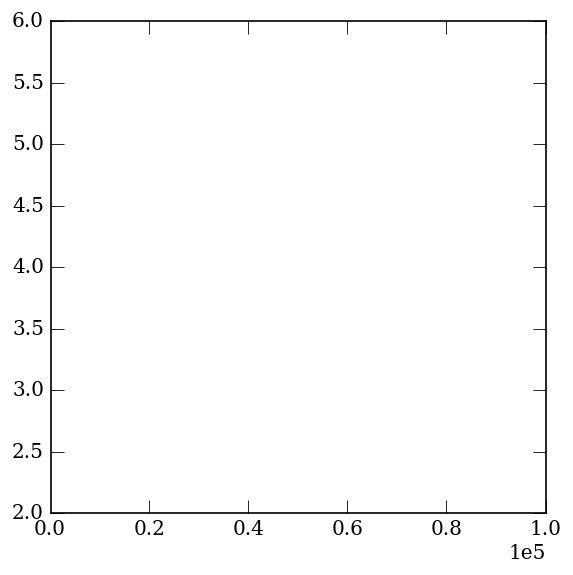

In [32]:
fig,ax = subplots()
ax.axis([100,1.e5,2,6])


In [27]:
def animate(i):
    ax.clear()
    if(i > 0):

        ax.semilogx(distance[:distance.size/2],pps[0,:],lw=.5,c='b')
        ax.semilogx(distance[:distance.size/2],ppsf[0,:],lw=.5,c='r')

    if(i > 25):

        ax.semilogx(distance[:distance.size/2],pps[25,:],lw=.5,c='b')
        ax.semilogx(distance[:distance.size/2],ppsf[25,:],lw=.5,c='r')

    if(i > 50):
        ax.semilogx(distance[:distance.size/2],pps[50,:],lw=.5,c='b')
        ax.semilogx(distance[:distance.size/2],ppsf[50,:],lw=.5,c='r')

    if(i > 75):
        ax.semilogx(distance[:distance.size/2],pps[75,:],lw=.5,c='b')
        ax.semilogx(distance[:distance.size/2],ppsf[75,:],lw=.5,c='r')
        
    ax.semilogx(distance[:distance.size/2],pps[i,:],lw=2,c='b')
    ax.semilogx(distance[:distance.size/2],ppsf[i,:],lw=2,c='r')

    ax.scatter(distance[:distance.size/2],pps[i,:],marker='^',c='b',edgecolor='b',s=70)
    ax.scatter(distance[:distance.size/2],ppsf[i,:],marker='*',c='r',edgecolor='r',s=70)

    ax.text(150,5.70,years[i])
    ax.axis([100,1.e5,2,6])
    ax.set_xlabel('Distance (m)')
    ax.set_ylabel('Minutes per mile')

In [30]:
ani = animation.FuncAnimation(fig,animate,arange(years.size))

### The progress of world records through time
Women's record pace in red.

Men's record pace in blue.


In [31]:
HTML(ani.to_html5_video())


### Calculate how long ago men ran at the same pace as women do in current world records.

In [33]:
print "Distance  year  dt"
dyear = zeros(distance.size/2)
for i in arange(distance.size/2):
    #check date when men had same time as latest women's record
    min_ind = df2['Time'][(df2['Gender']=='f')*(df2['Distance']==distance[i])].argmin()
    f_year = df2['Year'][min_ind]
    f_time = df2['Time'][min_ind]
    try:
        m_year = df2['Year'][(df2['Gender']=='m')*(df2['Distance']==distance[i])*(df2['Time']>=f_time)].values[-1]
    except:
        m_year = f_year+1
    dyear[i] = f_year-m_year
    print distance[i],f_year, f_year-m_year

Distance  year  dt
100.0 1988.58333333 67.8333333333
200.0 1988.75 -1.0
400.0 1985.83333333 73.25
800.0 1983.58333333 -1.0
1000.0 1996.66666667 77.9166666667
1500.0 1993.75 67.0
1609.34 1996.66666667 81.0833333333
2000.0 1994.58333333 69.0833333333
3000.0 1993.75 53.0833333333
5000.0 2008.5 76.0
10000.0 2003.16666667 -1.0
20000.0 2015.16666667 53.5833333333
21097.5 2015.16666667 48.6666666667
25000.0 2010.41666667 55.0
42195.0 2003.33333333 48.8333333333


/home/pootz/anaconda2/lib/python2.7/site-packages/pandas/computation/expressions.py:181: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))


In [34]:
def extend_year(x,year=2015):
    return append(x,year)
def extend_data(x):
    return append(x,x[-1])
targ = []
def eplot(*args, **kwargs):
   
    argtmp = [extend_year(args[0]),extend_data(args[1])]
    for i in args[2:]:
        argtmp.append(i)
    argtmp = tuple(argtmp)
    plot(*argtmp,**kwargs)

### World Records by event
Plot the Men's (Blue) and Women's (Red) world records times for each event.  The dashed blue line show the Men's records, shifted in time.

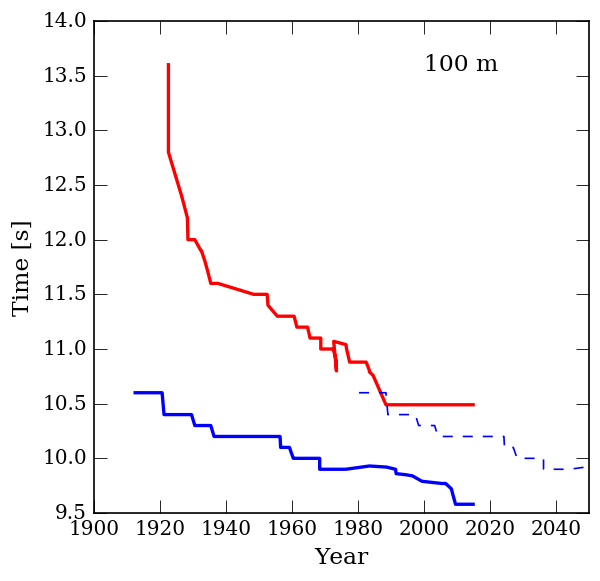

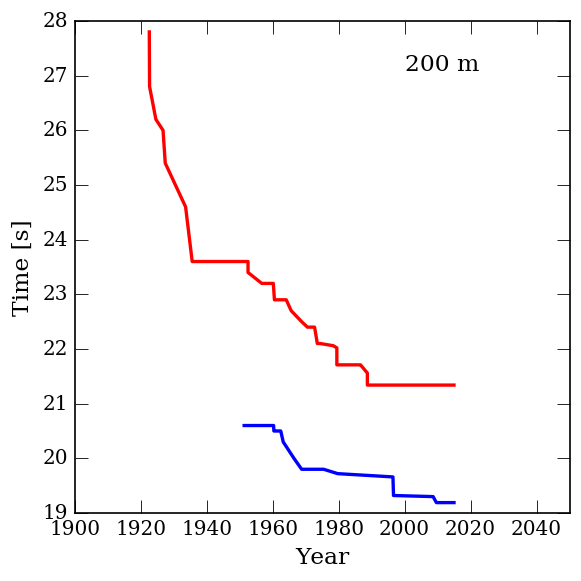

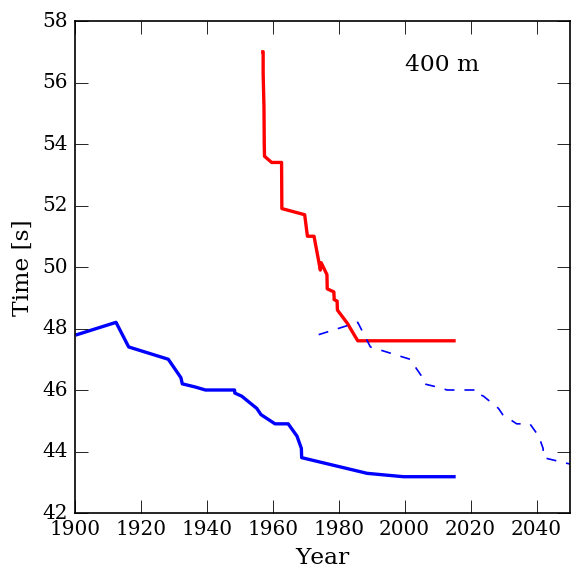

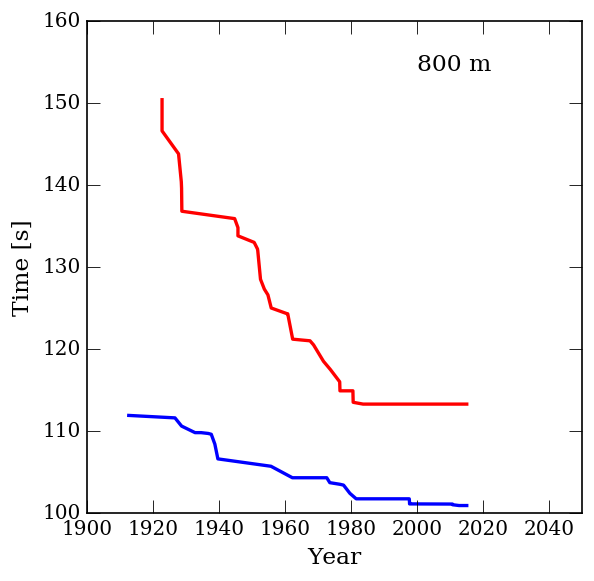

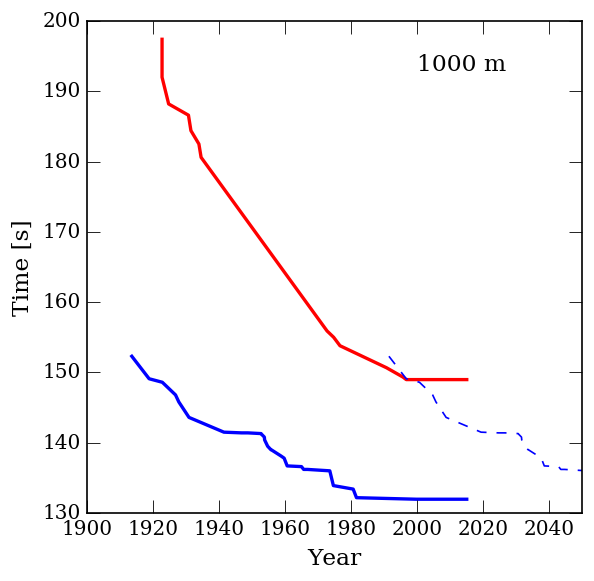

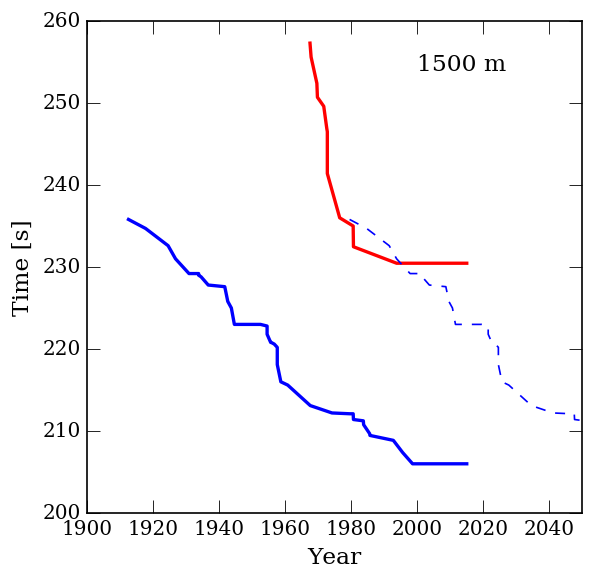

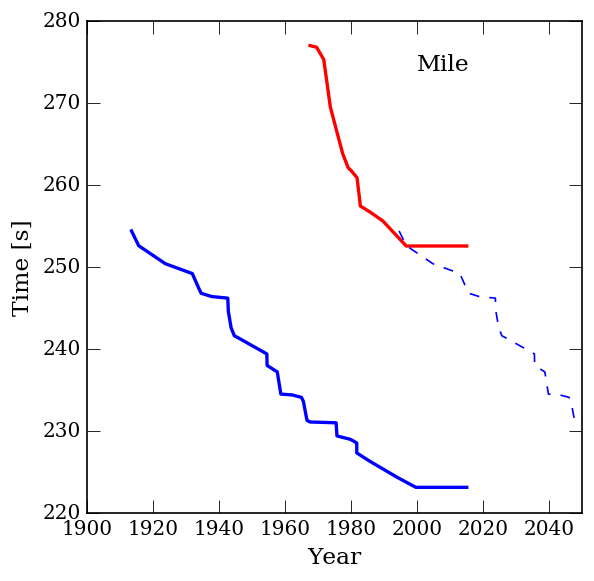

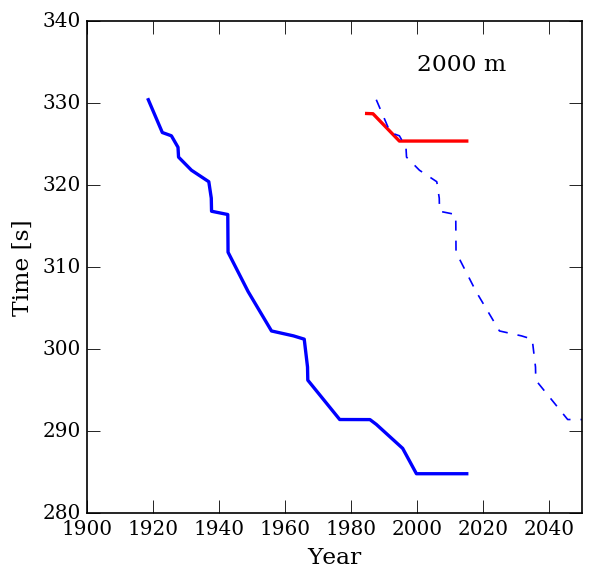

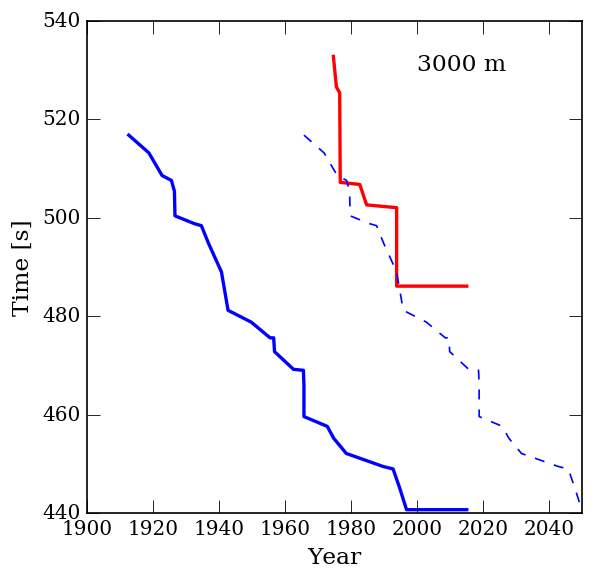

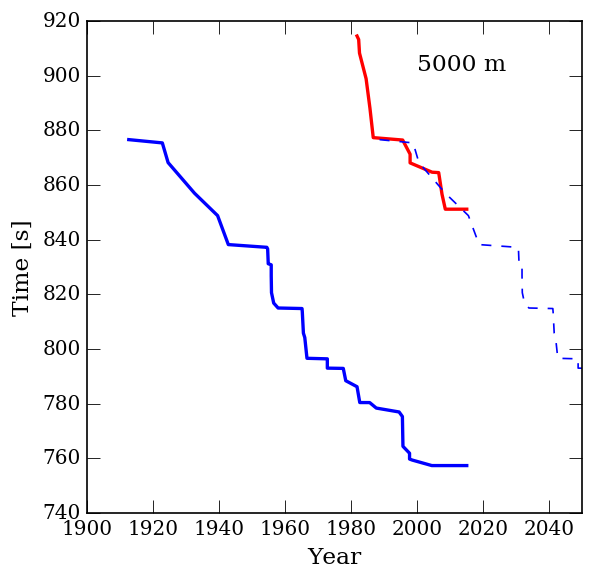

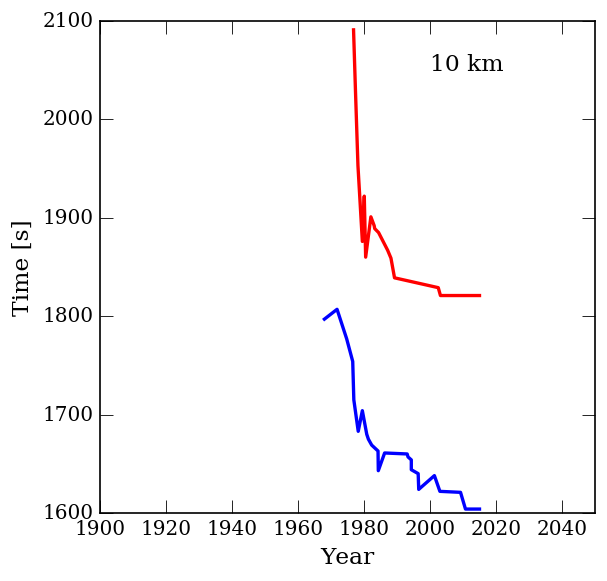

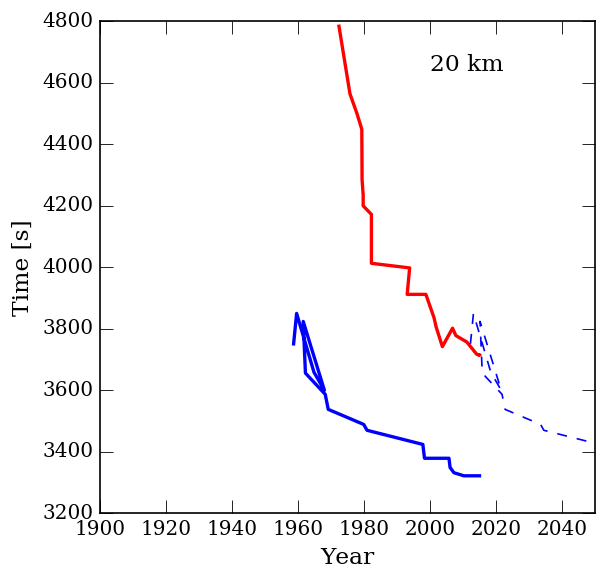

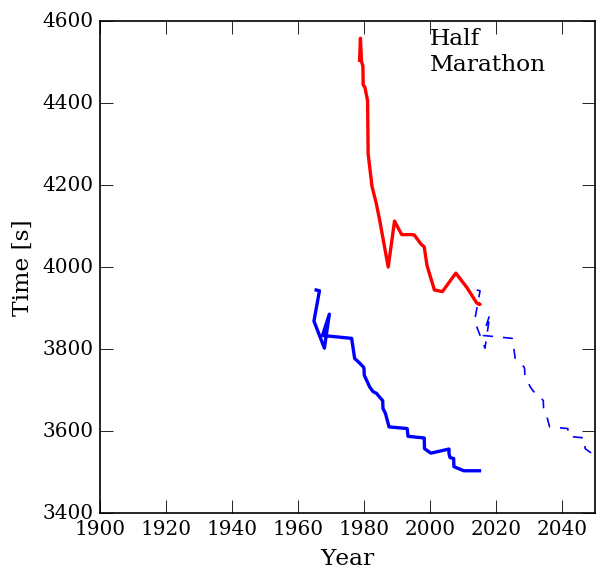

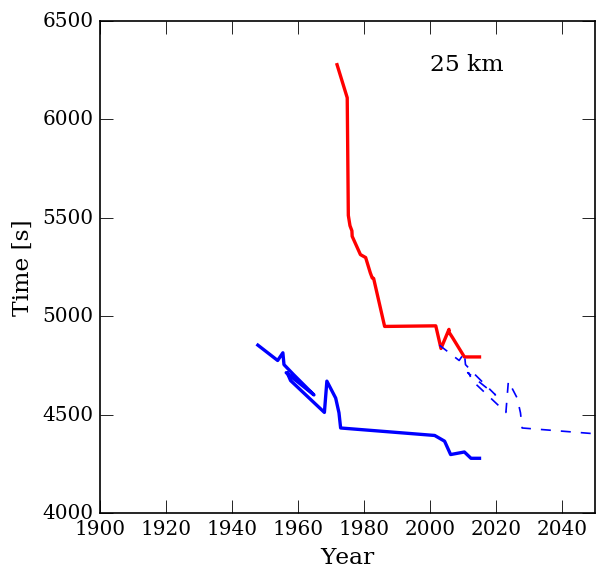

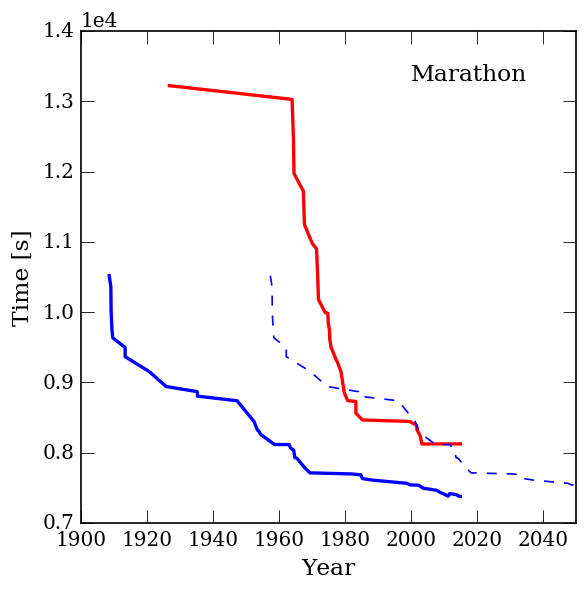

In [35]:
for i in arange(distance.size/2):
    figure()
    mtime = (df2['Gender']=='m')*(df2['Distance']==distance[i])
    ftime = (df2['Gender']=='f')*(df2['Distance']==distance[i])
    eplot(df2['Year'][mtime].values,df2['Time'][mtime].values,'b-',lw=2)
    eplot(df2['Year'][ftime].values,df2['Time'][ftime].values,'r-',lw=2)
    if(dyear[i]>0):
        plot(df2['Year'][mtime].values+dyear[i],df2['Time'][mtime].values,'b--',lw=1)
    xlabel(r'Year')
    ylabel(r'Time [s]')
    xlim([1900,2050])
    yup = axis()[3]
    ybt = axis()[2]
    text(2000,(.9)*(yup-ybt)+ybt,Ndistance[i])
    # label()

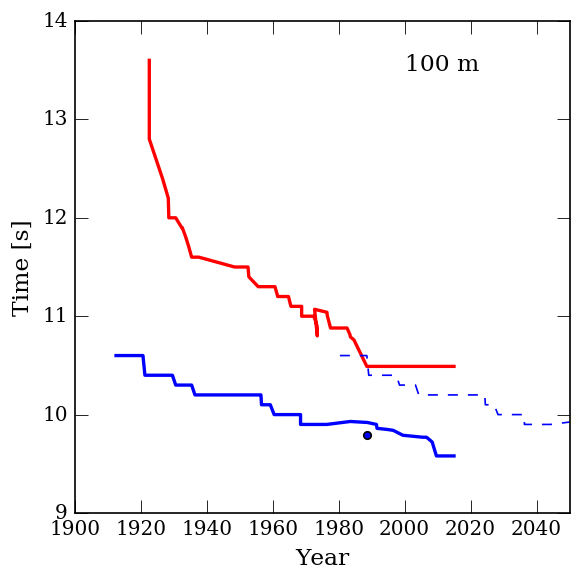

In [36]:
for i in [0]:
    figure()
    mtime = (df2['Gender']=='m')*(df2['Distance']==distance[i])
    ftime = (df2['Gender']=='f')*(df2['Distance']==distance[i])
    eplot(df2['Year'][mtime].values,df2['Time'][mtime].values,'b-',lw=2)
    eplot(df2['Year'][ftime].values,df2['Time'][ftime].values,'r-',lw=2)
    scatter(1988.75,9.79)
    if(dyear[i]>0):
        plot(df2['Year'][mtime].values+dyear[i],df2['Time'][mtime].values,'b--',lw=1)
    xlabel(r'Year')
    ylabel(r'Time [s]')
    xlim([1900,2050])
    yup = axis()[3]
    ybt = axis()[2]
    text(2000,(.9)*(yup-ybt)+ybt,Ndistance[i])
    # label()

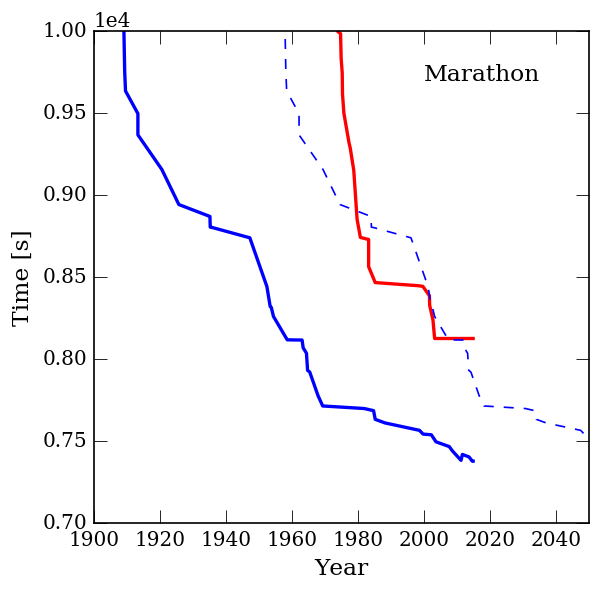

In [37]:
for i in [14]:
    figure()
    mtime = (df2['Gender']=='m')*(df2['Distance']==distance[i])
    ftime = (df2['Gender']=='f')*(df2['Distance']==distance[i])
    eplot(df2['Year'][mtime].values,df2['Time'][mtime].values,'b-',lw=2)
    eplot(df2['Year'][ftime].values,df2['Time'][ftime].values,'r-',lw=2)
#    scatter(2016,2*60*60+15*60+25,marker='*',c='r')
    if(dyear[i]>0):
        plot(df2['Year'][mtime].values+dyear[i],df2['Time'][mtime].values,'b--',lw=1)
    xlabel(r'Year')
    ylabel(r'Time [s]')
    xlim([1900,2050])
    ylim([7000,10000])
    yup = axis()[3]
    ybt = axis()[2]
    text(2000,(.9)*(yup-ybt)+ybt,Ndistance[i])
    # label()

Marathon time improvement for the men:

In [38]:
1-df2['Time'][mtime].values.min()/df2['Time'][mtime].values.max()

0.29865759050806207

Difference between Men's and Women's world records

In [39]:
1-df2['Time'][mtime].values.min()/df2['Time'][ftime].values.min()

0.092061538461538417

### Efffects of Doping?

It is apparent that the pace of new Women's world record's is not the same as the Men's, especially in the short distance races.

This effects is well documented (see, e.g., http://www.slate.com/articles/sports/sports_nut/2011/08/unbreakable.html), and has even led the UK to call for a new start in tracking world records (https://www.theguardian.com/sport/2016/jan/11/uk-athletics-calls-for-world-records-to-be-reset-due-to-doping-crisis-athletics) 

In [40]:
mrecords_after_88 = zeros(distance.size/2)
frecords_after_88 = zeros(distance.size/2)
mrecords_before_88 = zeros(distance.size/2)
frecords_before_88 = zeros(distance.size/2)
mrecords_long = zeros(distance.size/2)
frecords_long = zeros(distance.size/2)
for i in arange(distance.size/2):
    mtime = (df2['Gender']=='m')*(df2['Distance']==distance[i])
    ftime = (df2['Gender']=='f')*(df2['Distance']==distance[i])
    frecords_after_88[i] =  df2['Year'][ftime*(df2['Year']>1988)].count()
    mrecords_after_88[i] =   df2['Year'][mtime*(df2['Year']>1988)].count()
    frecords_before_88[i] =  df2['Year'][ftime*(df2['Year']<=1988)*(df2['Year']>1961)].count()
    mrecords_before_88[i] =  df2['Year'][mtime*(df2['Year']<=1988)*(df2['Year']>1961)].count()
    if(df2['Year'][ftime].min() < 1962):
        frecords_long[i] = 1
    if(df2['Year'][mtime].min() < 1962):
        mrecords_long[i] = 1
    
    # label()

In [41]:
df2['Year'][ftime].min()

1926.8333333333333

## Number of world records before and after drug testing

In 1989 the IAAF starting randomzied drug screening outside of competitions (http://www.iaaf.org/about-iaaf/medical-anti-doping).  So we look at the number of world records broken in the 27 years before drug testing began, and 27 records after.



First the women:

/home/pootz/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 30 but corresponding boolean dimension is 15
  if __name__ == '__main__':
/home/pootz/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 30 but corresponding boolean dimension is 15
  app.launch_new_instance()


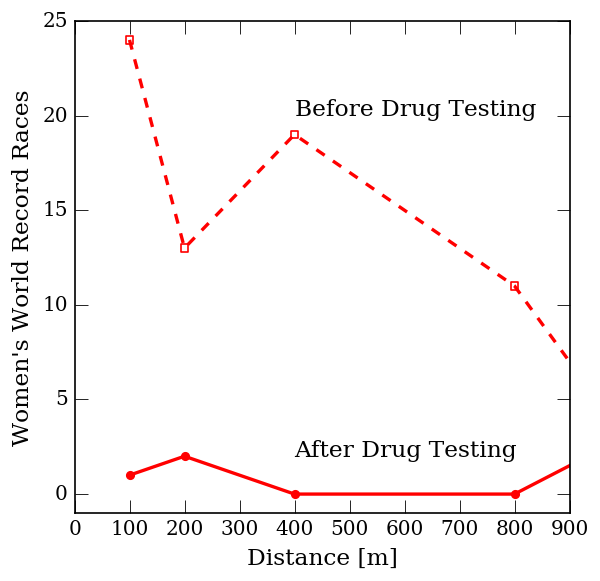

In [42]:
plot(distance[(frecords_long==1.0)*(mrecords_long==1.0)], 
     frecords_before_88[[(frecords_long==1.0)*(mrecords_long==1.0)]],'r--',lw=2)
plot(distance[(frecords_long==1.0)*(mrecords_long==1.0)], 
     frecords_after_88[[(frecords_long==1.0)*(mrecords_long==1.0)]],'r-',lw=2)
for i in arange(distance.size/2)[(frecords_long==1.0)*(mrecords_long==1.0)]:
    #print Ndistance[i]
    scatter(distance[i],frecords_after_88[i],color='r')

    scatter(distance[i],frecords_before_88[i],color='None',marker='s',edgecolor='r')
xlim(0,900)
ylim(-1,25)
text(400,20,'Before Drug Testing')
text(400,2,'After Drug Testing')
xlabel('Distance [m]')
ylabel('Women\'s World Record Races')

/home/pootz/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 30 but corresponding boolean dimension is 15
  if __name__ == '__main__':
/home/pootz/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 30 but corresponding boolean dimension is 15
  app.launch_new_instance()


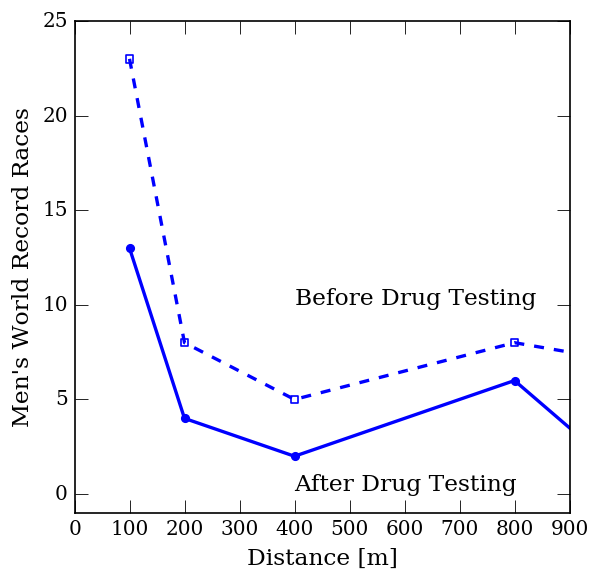

In [43]:
plot(distance[(mrecords_long==1.0)*(mrecords_long==1.0)], 
     mrecords_before_88[[(mrecords_long==1.0)*(mrecords_long==1.0)]],'b--',lw=2)
plot(distance[(mrecords_long==1.0)*(mrecords_long==1.0)], 
     mrecords_after_88[[(mrecords_long==1.0)*(mrecords_long==1.0)]],'b-',lw=2)
for i in arange(distance.size/2)[(mrecords_long==1.0)*(mrecords_long==1.0)]:
    #print Ndistance[i]
    scatter(distance[i],mrecords_after_88[i],color='b')

    scatter(distance[i],mrecords_before_88[i],color='None',marker='s',edgecolor='b')
xlim(0,900)
ylim(-1,25)
text(400,10,'Before Drug Testing')
text(400,0.2,'After Drug Testing')
xlabel('Distance [m]')
ylabel('Men\'s World Record Races')

In [44]:
print "Mean women's records before testing:", mean(frecords_before_88), " vs ", mean(frecords_after_88), "after testing"

Mean women's records before testing: 11.6666666667  vs  4.0 after testing


In [45]:
print "Mean men's records before testing:", mean(mrecords_before_88), " vs ", mean(mrecords_after_88), "after testing"

Mean men's records before testing: 10.4666666667  vs  5.93333333333 after testing


In [46]:
print "Mean men's records before testing:", mean(mrecords_before_88[1:]), " vs ", mean(mrecords_after_88[1:]), "after testing"

Mean men's records before testing: 9.57142857143  vs  5.42857142857 after testing
